## Análise de Dados Titanic

### Dicionário de Dados Tabela Titanic

- **PassagerId**: Id do passageiro
- **Survived**: sobreviveu (0 = não, 1 = sim)
- **Pclass**: Classe do passageiro (1 = primeira, 2 = segunda, 3 = terceira)
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do Passageiro
- **Sib Sp**: Número de irmãos/esposa(o) a bordo com o passageiro
- **Parch**: Número de pais/filhos a bordo com o passageiro
- **Ticket**: Número da passagem
- **Fare**: Preço da passagem
- **Cabin**: cabine
- **Embarked**: Local em que o passageiro embarcou:
    - *C* = Cherbourg
    - *Q* = Queenstown
    - *S* = Southampton


## Tratamento dos Dados e inspeção inicial

Aqui abrimos o arquivo de dados com o read para expor os primeiros 10 registros usando o head(10)

In [1]:
import pandas as pd # fazendo a importação da biblioteca pandas usada para manipulação de dados 

titanic_df = pd.read_csv("titanic.csv") # read lê o arquivo csv e armazenando na variável titanic_df

titanic_df.head(10) # exibe as 10 primeiras linhas do DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Aqui descobrimos os tipos de variaveis que estão contidos no conjunto de dados usando o método .info() e as colunas com dados nulos

In [2]:
titanic_df.info() # o método .info() serve para obter um resumo rápido. Isso te diz o tipo de dado de cada coluna (numérico, objeto, etc.), e o mais importante, quantos valores não-nulos existem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


verifica o total e a proporção de nulos no DataFrame

In [3]:
titanic_df.isnull() # isnull verifica valores nulos no DataFrame
titanic_df.isnull().sum()/len(titanic_df) # sun soma a quantidade de valores nulos por coluna e divide pelo total de linhas do DataFrame    

pd.DataFrame(zip(titanic_df.isnull().sum(),titanic_df.isnull().sum()/len(titanic_df)), columns=['Count', 'Proportion'], index=titanic_df.columns) # zip combina os dois resultados em um único DataFrame com colunas 'Count' e 'Proportion', onde 'Count' é a contagem de valores nulos e 'Proportion' é a proporção de valores nulos em relação ao total de linhas do DataFrame.

,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


Tomar uma decisão sobre cada coluna

Cabin: Esta coluna tem muitos valores ausentes. É difícil preenchê-la de forma significativa. O melhor é descartá-la da análise.

In [4]:
# Remove a coluna 'Cabin' do DataFrame
titanic_df.drop('Cabin', axis=1, inplace=True) # axis=1 indica que estamos removendo uma coluna (não uma linha), inplace=True significa que a alteração é feita diretamente no DataFrame original, sem a necessidade de criar uma cópia.

Age: A idade é uma informação importante para a análise de sobrevivência. Você pode preencher os valores ausentes com a média ou a mediana da coluna, ou até mesmo usar a média por classe (Pclass), pois a idade média pode variar entre a primeira e a terceira classe.

In [5]:
# Preenche os valores nulos de 'Age' com a mediana da idade por classe (Pclass)
titanic_df['Age'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median())) # groupby agrupa os dados por 'Pclass', transform aplica a função a cada grupo, e lambda x: x.fillna(x.median()) preenche os valores nulos com a mediana do grupo.

Embarked: Esta coluna tem poucos valores ausentes. Você pode preenchê-los com a moda (o valor que mais se repete).

In [6]:
# Preenche os valores nulos de 'Embarked' com a moda da coluna
import numpy as np 
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True) # mode()[0] obtém o valor mais frequente (moda) na coluna 'Embarked' e fillna preenche os valores nulos com esse valor. inplace=True aplica a alteração diretamente no DataFrame original.

C:\Users\sammy\AppData\Local\Temp\ipykernel_16324\720481422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True) # mode()[0] obtém o valor mais frequente (moda) na coluna 'Embarked' e fillna preenche os valores nulos com esse valor. inplace=True aplica a alteração diretamente no DataFrame original.


In [7]:
titanic_df.isnull() # isnull verifica valores nulos no DataFrame
titanic_df.isnull().sum()/len(titanic_df) # sun soma a quantidade de valores nulos por coluna e divide pelo total de linhas do DataFrame    

pd.DataFrame(zip(titanic_df.isnull().sum(),titanic_df.isnull().sum()/len(titanic_df)), columns=['Count', 'Proportion'], index=titanic_df.columns) # zip combina os dois resultados em um único DataFrame com colunas 'Count' e 'Proportion', onde 'Count' é a contagem de valores nulos e 'Proportion' é a proporção de valores nulos em relação ao total de linhas do DataFrame.

,Count,Proportion
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


## Tratamento de Dados Categóricos

A maioria dos modelos de Machine Learning só funciona com dados numéricos. Colunas como Sex e Embarked precisam ser convertidas.

In [8]:
# Identifica colunas categóricas (tipo object)
colunas_categoricas = titanic_df.select_dtypes(include='object').columns.tolist()
print("Colunas categóricas:", colunas_categoricas) # select_dtypes seleciona colunas do tipo 'object' (categóricas) e columns.tolist() converte o índice das colunas em uma lista.

Colunas categóricas: ['Name', 'Sex', 'Ticket', 'Embarked']


Para mapear colunas binárias, como Sex, para valores numéricos (1 e 2)

In [9]:
# Mapeia a coluna 'Sex' para valores numéricos: 'male' = 1, 'female' = 2
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 2}) # map substitui os valores na coluna 

Usar One-Hot Encoding: Para colunas com mais de dois valores, como Embarked ('S', 'C', 'Q'), o melhor é usar uma técnica chamada One-Hot Encoding. Isso cria uma nova coluna para cada valor único, e atribui 1 se o valor estiver presente e 0 se não estiver. Isso evita que o modelo interprete uma ordem entre os valores (ex: S > C > Q, o que não faz sentido).

In [10]:
# Aplica One-Hot Encoding na coluna 'Embarked'
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked']) # get_dummies cria colunas binárias para cada categoria na coluna 'Embarked' e substitui a coluna original no DataFrame.

In [11]:
# Identifica colunas categóricas (tipo object)
colunas_categoricas = titanic_df.select_dtypes(include='object').columns.tolist()
print("Colunas categóricas:", colunas_categoricas) # select_dtypes seleciona colunas do tipo 'object' (categóricas) e columns.tolist() converte o índice das colunas em uma lista.

Colunas categóricas: ['Name', 'Ticket']


Visualizando as mudanças nas colunas

In [12]:
titanic_df.info() # o método .info() serve para obter um resumo rápido. Isso te diz o tipo de dado de cada coluna (numérico, objeto, etc.), e o mais importante, quantos valores não-nulos existem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 72.3+ KB


Após tratar os dados ausentes e as colunas categóricas, criamos novas variáveis que capturam informações mais ricas.

Variável FamilySize (Tamanho da Família)

In [13]:
# Cria a coluna 'FamilySize' somando SibSp, Parch e adicionando 1 (o próprio passageiro)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # cria uma nova coluna 'FamilySize' que é a soma das colunas 'SibSp' e 'Parch', mais 1 para incluir o próprio passageiro.

Variável IsAlone (Está Sozinho):

In [14]:
# Cria a coluna 'IsAlone': 1 se o passageiro está sozinho, 0 caso contrário
titanic_df['IsAlone'] = titanic_df['FamilySize'].apply(lambda x: 1 if x == 1 else 2) # apply aplica a função lambda a cada valor na coluna 'FamilySize', retornando 1 se o valor for 1 (passageiro sozinho) e 2 caso contrário.

Tratar a Coluna Age de Forma Mais Inteligente:

Em vez de apenas usar a idade exata, que pode ter valores ausentes e uma distribuição ampla, criamos faixas etárias.

Por quê? A taxa de sobrevivência para uma criança de 2 anos é provavelmente muito diferente da de um adulto de 45, mas similar à de uma criança de 5 anos.

In [15]:
# Criando a coluna 'AgeGroup' categorizando os passageiros por faixa etária
def categoriza_idade(age): # define a função categoriza_idade que recebe a idade como entrada
    if age < 13: # se a idade for menor que 13
        return 'Criança' # retorna 'Criança'
    elif age < 18:# se a idade for menor que 18
        return 'Adolescente'# retorna 'Adolescente'
    elif age < 60:# se a idade for menor que 60
        return 'Adulto'# retorna 'Adulto'
    else:# se não for nenhuma das anteriores
        return 'Idoso'# retorna 'Idoso'

titanic_df['AgeGroup'] = titanic_df['Age'].apply(categoriza_idade) # apply aplica a função categoriza_idade a cada valor na coluna 'Age' e cria uma nova coluna 'AgeGroup' com os resultados.

Tratamos a Coluna Fare (Tarifa):

A tarifa também pode ser uma variável importante. No entanto, ela tem uma distribuição muito concentrada em valores baixos e poucos valores altos.

Você pode usar uma transformação logarítmica para deixar a distribuição mais "normal" ou, similar à idade, criar faixas de tarifa.

In [16]:
# Criamos a coluna 'FareGroup' categorizando os passageiros por faixa de tarifa
def categoriza_tarifa(fare): # define a função categoriza_tarifa que recebe a tarifa como entrada
    if fare < 10:# se a tarifa for menor que 10
        return 'Baixa'# retorna 'Baixa'
    elif fare < 30:# se a tarifa for menor que 30
        return 'Média'# retorna 'Média'
    elif fare < 70:# se a tarifa for menor que 70
        return 'Alta'# retorna 'Alta'
    else:# se não for nenhuma das anteriores
        return 'Muito Alta'# retorna 'Muito Alta'

titanic_df['FareGroup'] = titanic_df['Fare'].apply(categoriza_tarifa)# apply aplica a função categoriza_tarifa a cada valor na coluna 'Fare' e cria uma nova coluna 'FareGroup' com os resultados.

titanic_df.head(5) # exibe as 10 primeiras linhas do DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True,2,2,Adulto,Baixa
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,True,False,False,2,2,Adulto,Muito Alta
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1,Adulto,Baixa
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,False,False,True,2,2,Adulto,Alta
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True,1,1,Adulto,Baixa


Extrair o Título do Nome (Name):

A coluna Name parece inútil, mas o título (Sr., Sra., Miss., Master, etc.) pode ter um forte poder preditivo.

'Miss' e 'Master' geralmente indicam crianças ou mulheres jovens, enquanto 'Mr' e 'Mrs' indicam adultos.

Extraimos o título do nome e criamos uma nova coluna Title. Isso pode ser extremamente útil para prever a sobrevivência.

In [17]:
# Extraindo o título do nome e criando a coluna 'Title'
titanic_df['Title'] = titanic_df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip() # str.extract usa uma expressão regular para extrair o título do nome, expand=False retorna uma Série em vez de um DataFrame, e str.strip() remove espaços em branco extras.

In [18]:
titanic_df.head(3) # exibe as 10 primeiras linhas do DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True,2,2,Adulto,Baixa,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,True,False,False,2,2,Adulto,Muito Alta,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1,Adulto,Baixa,Miss


# Análises

**Análise 1**: Distribuição e Sobrevivência por Sexo e Classe
Essa é a análise mais fundamental, pois a história sugere que a sobrevivência foi fortemente influenciada por esses dois fatores.

Pergunta: Qual é a taxa de sobrevivência entre homens e mulheres? E como essa taxa muda entre as classes sociais?

Análise:

Gráfico de Barras Agrupadas (barplot): Mostra a taxa de sobrevivência (Survived) para cada categoria de Sex(1= masc e 2= fem), separada por Pclass. Usando Seaborn, pois ele já calcula a média e a incerteza automaticamente.

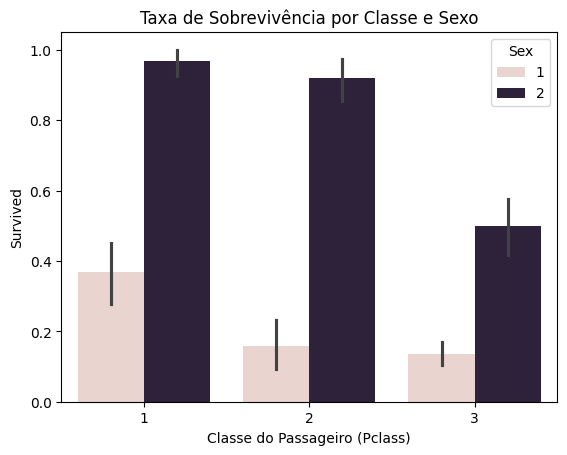

In [19]:
import seaborn as sns # importando a biblioteca seaborn para visualização de dados
import matplotlib.pyplot as plt # importando a biblioteca matplotlib para visualização de dados

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # cria um gráfico de barras agrupadas (barplot) com 'Pclass' no eixo x, 'Survived' no eixo y, e separação por '
plt.title('Taxa de Sobrevivência por Classe e Sexo')# adiciona um título ao gráfico
plt.xlabel('Classe do Passageiro (Pclass)')# adiciona um rótulo ao eixo x
plt.show()# exibe o gráfico

Visualização: O gráfico mostra claramente que a taxa de sobrevivência feminina foi significativamente maior que a masculina em todas as classes, mas a diferença é ainda mais notável entre as classes mais baixas.

**Análise 2**: Relação entre Idade e Sobrevivência
A idade é uma variável contínua, então a forma de visualizá-la precisa ser diferente.

Pergunta: A idade influenciou a taxa de sobrevivência? Crianças e idosos tiveram mais ou menos chances?

Análise:

Histogramas (histplot): Foi criado dois histogramas, um para os passageiros que sobreviveram e outro para os que não sobreviveram, para comparar a distribuição de Age entre os dois grupos.

Gráfico de Linha (lineplot): Para uma análise mais suave usamos um gráfico de linha. Ele pode mostrar a taxa média de sobrevivência (Survived) em relação a Age.

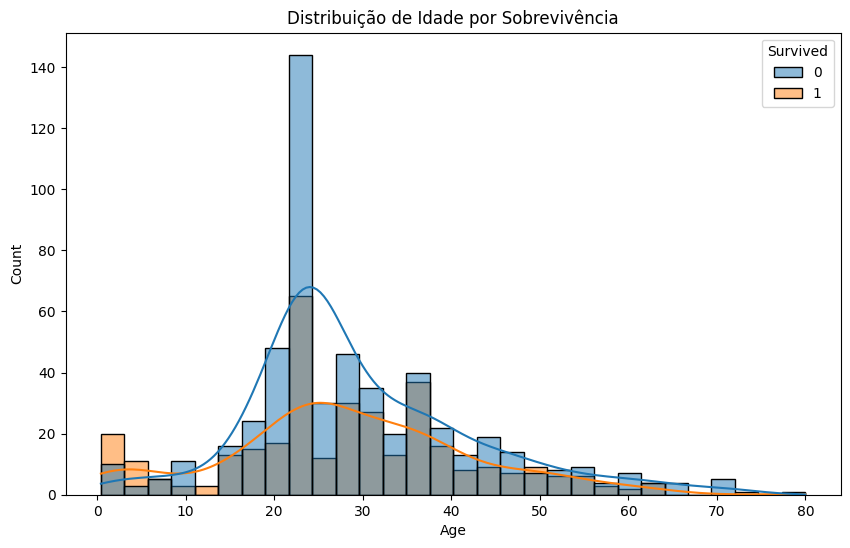

In [22]:
plt.figure(figsize=(10, 6)) # define o tamanho da figura do gráfico
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True, bins=30)# cria um histograma da coluna 'Age', com separação por 'Survived', adicionando uma linha de densidade (kde) e definindo o número de bins (barras) para 30
plt.title('Distribuição de Idade por Sobrevivência') # adiciona um título ao gráfico
plt.show() # exibe o gráfico

Visualização: Você deve notar uma alta taxa de sobrevivência entre as crianças pequenas, o que corrobora a história de "mulheres e crianças primeiro".

**Análise 3**: Relação entre Tarifa e Sobrevivência

Pergunta: A tarifa paga pela passagem influenciou a chance de sobrevivência?

Análise:

Gráfico de Dispersão (scatterplot): Use um gráfico de dispersão para plotar a Fare vs. Age, colorindo os pontos por Survived. Adicionar uma terceira variável (hue) enriquece a análise bivariada.

Boxplots (boxplot): Crie um boxplot para comparar a distribuição de Fare para os passageiros que sobreviveram e os que não sobreviveram. O boxplot é excelente para identificar a mediana, quartis e outliers.

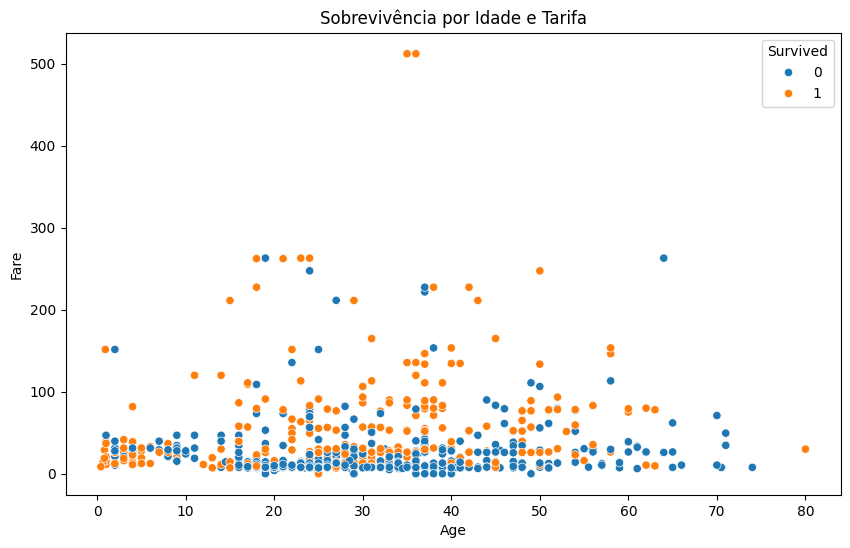

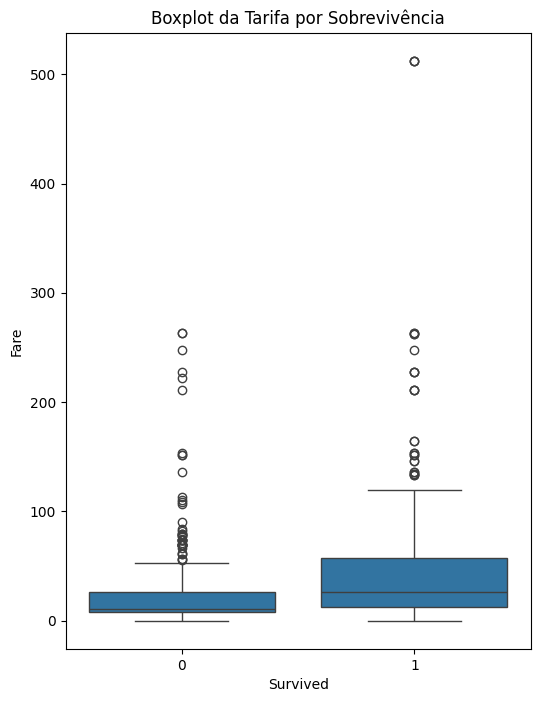

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Sobrevivência por Idade e Tarifa')
plt.show()

plt.figure(figsize=(6, 8))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Boxplot da Tarifa por Sobrevivência')
plt.show()

Visualização: Os boxplots provavelmente mostrarão que a mediana da tarifa para os sobreviventes é maior do que a dos não-sobreviventes.

**Análise 4**: Análise Bivariada de Relações
Pergunta: Viajar sozinho ou em família influenciou a sobrevivência?

Análise:

Gráfico de Barras: Crie um gráfico de barras para a nova coluna IsAlone. Mostre a taxa de sobrevivência (Survived) para os passageiros que estavam sozinhos (IsAlone=1) e para os que não estavam.

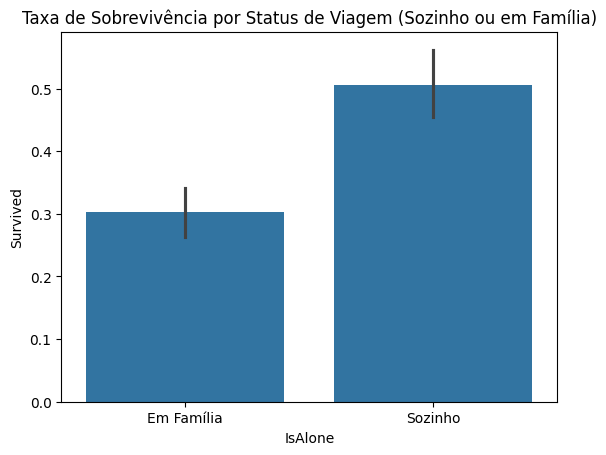

In [24]:
sns.barplot(x='IsAlone', y='Survived', data=titanic_df)# cria um gráfico de barras para a coluna 'IsAlone', mostrando a taxa de sobrevivência (Survived) para passageiros que estavam sozinhos (IsAlone=1) e para os que não estavam (IsAlone=2)
plt.title('Taxa de Sobrevivência por Status de Viagem (Sozinho ou em Família)')# adiciona um título ao gráfico
plt.xticks(ticks=[0, 1], labels=['Em Família', 'Sozinho'])# define os rótulos do eixo x
plt.show()# exibe o gráfico

Visualização: Você provavelmente verá que a taxa de sobrevivência dos passageiros que viajaram sozinhos foi menor do que a dos que viajaram em família.

**Análise 5**: Matriz de Correlação
A matriz de correlação é uma ferramenta essencial para entender as relações entre todas as suas variáveis numéricas.

Pergunta: Quais variáveis numéricas estão mais correlacionadas entre si?

Análise:

Mapa de Calor (heatmap): Calcule a matriz de correlação para as colunas numéricas (Age, Fare, Survived, etc.) e visualize-a usando um heatmap.

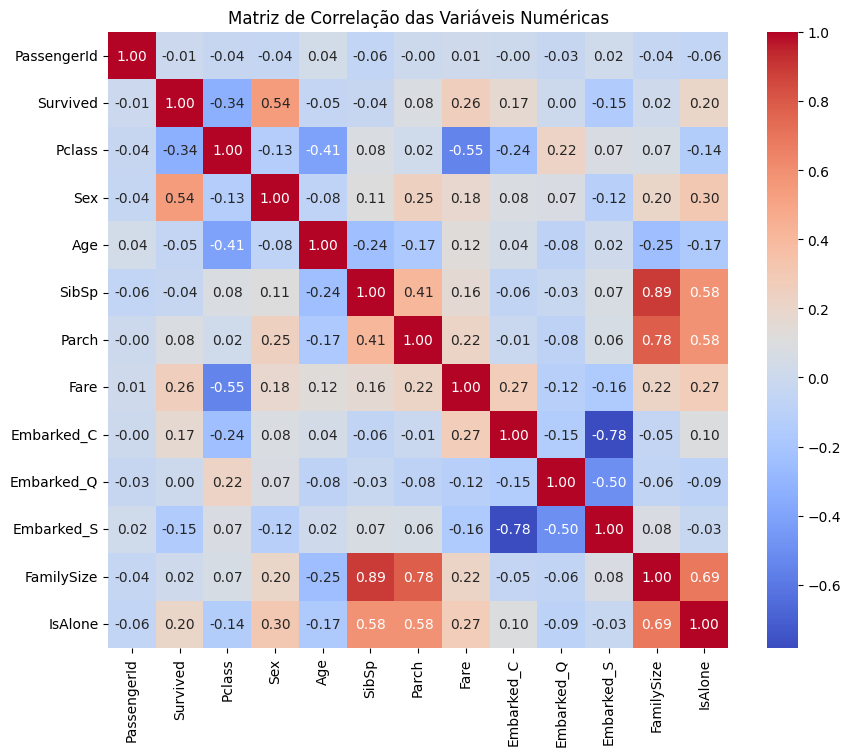

In [25]:
plt.figure(figsize=(10, 8)) # define o tamanho da figura do gráfico
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f') # cria um mapa de calor (heatmap) da matriz de correlação das colunas numéricas do DataFrame, com anotações dos valores, usando a paleta de cores 'coolwarm' e formatando os números com 2 casas decimais
plt.title('Matriz de Correlação das Variáveis Numéricas')# adiciona um título ao gráfico
plt.show()# exibe o gráfico

Visualização: Os valores próximos de 1 ou -1 indicam uma forte correlação (positiva ou negativa). Por exemplo, Survived deve ter uma correlação negativa com Pclass (quanto maior a classe, menor o número, maior a sobrevivência).

**Análise 6**: Porcentagem de Sobrevivência por Classe
Pergunta: Qual a relação entre a classe de passagem (Pclass) e a porcentagem de sobrevivência?

Hipótese: A taxa de sobrevivência é maior para passageiros de classes mais altas, já que eles provavelmente tiveram acesso mais fácil aos botes salva-vidas.

C:\Users\sammy\AppData\Local\Temp\ipykernel_16324\4255383927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_pclass, palette='viridis')# cria um gráfico de barras (barplot) com 'Pclass' no eixo x e a taxa de sobrevivência média ('Survived') no eixo y, usando a paleta de cores 'viridis'


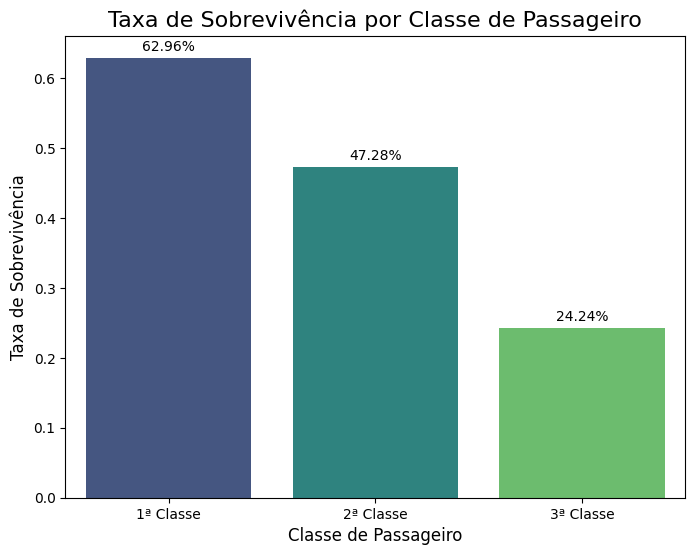

In [26]:
# Calcular a taxa de sobrevivência por classe
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean().reset_index()# agrupa os dados por 'Pclass', calcula a média da coluna 'Survived' para cada classe, e reseta o índice para transformar o resultado em um DataFrame

# Visualizar com um gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))# define o tamanho da figura do gráfico
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_pclass, palette='viridis')# cria um gráfico de barras (barplot) com 'Pclass' no eixo x e a taxa de sobrevivência média ('Survived') no eixo y, usando a paleta de cores 'viridis'

# Adicionar título e rótulos
plt.title('Taxa de Sobrevivência por Classe de Passageiro', fontsize=16)# adiciona um título ao gráfico com fonte de tamanho 16
plt.xlabel('Classe de Passageiro', fontsize=12)# adiciona um rótulo ao eixo x com fonte de tamanho 12
plt.ylabel('Taxa de Sobrevivência', fontsize=12)# adiciona um rótulo ao eixo y com fonte de tamanho 12
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])# define os rótulos do eixo x

# Adicionar porcentagens acima das barras para melhor visualização
for index, row in survival_rate_by_pclass.iterrows():# itera sobre cada linha do DataFrame survival_rate_by_pclass
    plt.text(row.name, row.Survived + 0.01, f'{row.Survived:.2%}', color='black', ha="center")# adiciona um texto acima de cada barra no gráfico, mostrando a taxa de sobrevivência formatada como porcentagem com 2 casas decimais

plt.show()# exibe o gráfico

Conclusão: A análise confirma a hipótese inicial. A taxa de sobrevivência dos passageiros da 1ª classe foi significativamente maior do que a da 2ª, que por sua vez foi maior que a da 3ª classe. Isso sugere que a classe social foi um fator determinante para a sobrevivência no naufrágio.

**Análise 7**: Distribuição da Tarifa
Pergunta: Como a tarifa (Fare) dos passageiros está distribuída? Quais são a média, a mediana e a moda dessa distribuição?

Análise: Combinar o boxplot e o histograma em um único gráfico é uma excelente técnica.

O histograma nos mostra a frequência de diferentes faixas de tarifa, revelando se a distribuição é simétrica, inclinada para a direita ou esquerda, ou se tem picos múltiplos.

O boxplot resume a distribuição com quartis, a mediana e identifica os valores atípicos (outliers), que neste caso representam as tarifas mais caras.

C:\Users\sammy\AppData\Local\Temp\ipykernel_16324\1369486240.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # Ajusta o layout para evitar sobreposição


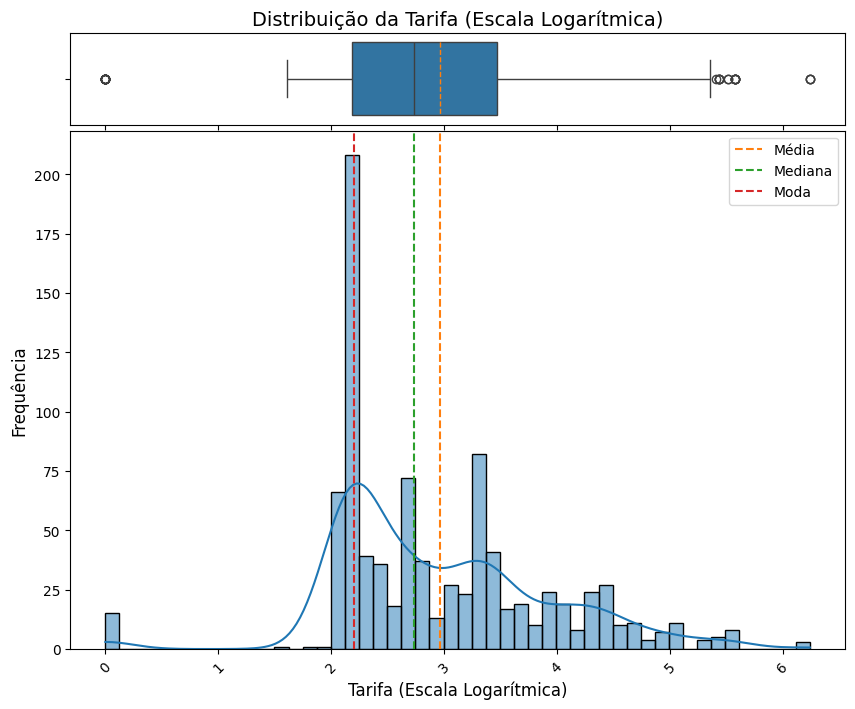

In [27]:
import numpy as np# importando a biblioteca numpy para operações numéricas
import matplotlib.ticker as mtick # importando a biblioteca matplotlib.ticker para formatação de ticks em gráficos

# Passo 1: Adicionar 1 para evitar log(0) e aplicar a transformação logarítmica
titanic_df['Fare_log'] = titanic_df['Fare'].apply(lambda x: x + 1).apply(np.log)# cria uma nova coluna 'Fare_log' aplicando a transformação logarítmica na coluna 'Fare', adicionando 1 para evitar log(0)

# Passo 2: Criar a visualização combinada
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02},
    figsize=(10, 8)
)

# Boxplot da Tarifa com transformação logarítmica
sns.boxplot(
    x="Fare_log",
    data=titanic_df,
    ax=ax1,
    showmeans=True,# indica que a média deve ser destacada no boxplot
    meanline=True,# indica que a média deve ser representada por uma linha no boxplot
    meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},# define as propriedades da linha que representa a média no boxplot
)
ax1.set_xlabel("")# remove o rótulo do eixo x
ax1.set_title('Distribuição da Tarifa (Escala Logarítmica)', fontsize=14)# adiciona um título ao gráfico com fonte de tamanho 14

# Histograma da Tarifa com transformação logarítmica
sns.histplot(
    x="Fare_log",
    data=titanic_df,
    bins=50,
    kde=True,
    ax=ax2,
)

# Adiciona linhas verticais para a média, mediana e moda
ax2.axvline(titanic_df["Fare_log"].mean(), color="C1", linestyle="--", label="Média")
ax2.axvline(titanic_df["Fare_log"].median(), color="C2", linestyle="--", label="Mediana")
ax2.axvline(titanic_df["Fare_log"].mode()[0], color="C3", linestyle="--", label="Moda")

# Configurações de formatação
ax2.set_xlabel("Tarifa (Escala Logarítmica)", fontsize=12)
ax2.set_ylabel("Frequência", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.legend()

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

Visualização: O gráfico resultante deve mostrar que a distribuição da tarifa é bastante inclinada para a direita, com a maioria dos passageiros pagando tarifas baixas, e a presença de um grande número de outliers. A mediana estará mais próxima do valor de 0, enquanto a média será puxada para cima pelos valores mais altos.